# Graph generation

## Import

In [1]:
import add_data
import utility_function
import nest_asyncio
import time 
import RAGAStest
import pandas as pd
import json


/Users/alexandra.tarantino/Desktop/master-thesis-tarantino/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!ls ../tests/data/profiles

In [2]:
user = "Javier"
path_data_profiles = "../tests/data/profiles/"
path_data_context = "../tests/data/context/"
path_data_qa = "../tests/data/qa/"
path_data_results = "../tests/data/results/"

## Data

In [3]:
# Percorso del file CSV
csv_filename = user + ".csv"

# Leggere il file CSV
df = pd.read_csv(path_data_profiles + csv_filename)

# Stampa delle prime righe per verificare il contenuto
print(df.head())

# Estrazione delle informazioni principali
def extract_data(df):
    for index, row in df.iterrows():
        print(f"Date: {row['date']}")
        print(f"User: {row['user']}")
        print(f"Input: {row['interaction']}")
        print("-" * 50)

# Eseguire l'estrazione
extract_data(df)


         date    user                                        interaction
0  2023-10-01  Javier  I want to start a new project called 'Communit...
1  2023-10-02  Javier  Today, I will sketch some initial ideas for th...
2  2023-10-03  Javier  Tomorrow, I plan to visit the Phoenix Art Muse...
3  2023-10-04  Javier  I have an appointment on 2023-10-06 at 10:00 A...
4  2023-10-05  Javier  Every Monday, I will spend two hours painting ...
Date: 2023-10-01
User: Javier
Input: I want to start a new project called 'Community Mural: Phoenix History'. The due date is 2023-12-15, and it's high priority. I want to depict the cultural history of Phoenix with other artists.
--------------------------------------------------
Date: 2023-10-02
User: Javier
Input: Today, I will sketch some initial ideas for the 'Community Mural: Phoenix History' project.
--------------------------------------------------
Date: 2023-10-03
User: Javier
Input: Tomorrow, I plan to visit the Phoenix Art Museum to gather insp

## Add data

### Process the text

In [5]:
#costo 0,01 (30 interazioni)
interactions = []

for index, row in df.iterrows():
    input = utility_function.process_text(text=row['interaction'], user_name=row['user'], current_date=row['date'])
    interactions.append(input)

context_df = pd.DataFrame(interactions)
context_df.to_csv(path_data_context + user + "_context.csv", index=False)

### Add to graph

In [6]:
#costo: 0,02 (aggiunta di 30 input + resolver)
nest_asyncio.apply()

#Adding data to the graph
for input in interactions:
    response = await add_data.add_data_to_graph(input)
    print(response)
    
#Resolving entities
nest_asyncio.apply()
res = await add_data.resolve_entities()
print(res)
    

{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 4, 'relationship_count': 6}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 4, 'relationship_count': 5}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 6, 'relationship_count': 10}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 5, 'relationship_count': 7}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 6, 'relationship_count': 9}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 5, 'relationship_count': 8}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 4, 'relationship_count': 5}}}
{'writer'

LLM response has improper format for chunk_index=0


{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 1, 'relationship_count': 0}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 5, 'relationship_count': 7}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 5, 'relationship_count': 7}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 2, 'relationship_count': 1}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 2, 'relationship_count': 1}}}
{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 5, 'relationship_count': 7}}}
{'writer':

In [8]:
print(interactions[16])

"I need to finalize the sketch for the mural by 2023-10-18 (Javier)."


In [9]:

response = await add_data.add_data_to_graph(interactions[16])
print(response)

res = await add_data.resolve_entities()
print(res)

{'writer': {'status': 'SUCCESS', 'metadata': {'node_count': 3, 'relationship_count': 3}}}
number_of_nodes_to_resolve=40 number_of_created_nodes=39


# Test

### Esecuzione test

In [10]:
#costo 0.02*2 (10 domande)
results_graphRAG = []
results_RAG = []

with open(path_data_qa + user + "_qa.json", "r", encoding="utf-8") as f:
    dataset = json.load(f)
    
    graphRAG = RAGAStest.run_tests(dataset)
    print("GraphRAG: ", graphRAG)
    results_graphRAG.append({"date": time.strftime("%Y-%m-%d %H:%M:%S"), 'user': user, 'results': graphRAG})
    
    RAG = RAGAStest.run_tests_RAG(dataset)
    print("RAG: ", RAG)
    results_RAG.append({"date": time.strftime("%Y-%m-%d %H:%M:%S"), 'user': user, 'results': RAG})


Evaluating: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


Evaluation results uploaded! View at https://app.ragas.io/dashboard/alignment/evaluation/46918f73-8158-4b0b-942b-e59bbbe19520
GraphRAG:  {'non_llm_context_precision_with_reference': 0.5833, 'non_llm_context_recall': 0.6500, 'answer_relevancy': 0.9620, 'faithfulness': 0.8408, 'semantic_similarity': 0.7387}


Evaluating: 100%|██████████| 50/50 [00:21<00:00,  2.30it/s] 


Evaluation results uploaded! View at https://app.ragas.io/dashboard/alignment/evaluation/4bb05777-1563-4385-af9b-cef0a565703a
RAG:  {'non_llm_context_precision_with_reference': 0.6833, 'non_llm_context_recall': 0.7333, 'answer_relevancy': 0.9391, 'faithfulness': 0.8667, 'semantic_similarity': 0.6757}


In [29]:
print(results_graphRAG)

[{'date': '2025-03-25 11:58:24', 'user': 'Javier', 'results': {'non_llm_context_precision_with_reference': 0.5833, 'non_llm_context_recall': 0.6500, 'answer_relevancy': 0.9620, 'faithfulness': 0.8408, 'semantic_similarity': 0.7387}}]


In [45]:
res_graphRAG = results_graphRAG[0]['results'].scores
res_RAG = results_RAG[0]['results'].scores

print(res_graphRAG)
print(res_RAG)


[{'non_llm_context_precision_with_reference': 0.9999999999, 'non_llm_context_recall': 1.0, 'answer_relevancy': 0.9931319791428072, 'faithfulness': 1.0, 'semantic_similarity': 0.603804910594145}, {'non_llm_context_precision_with_reference': 0.9999999999666667, 'non_llm_context_recall': 1.0, 'answer_relevancy': 0.975814404890765, 'faithfulness': 1.0, 'semantic_similarity': 0.72182546661519}, {'non_llm_context_precision_with_reference': 0.3333333333, 'non_llm_context_recall': 0.5, 'answer_relevancy': 0.9600209470432532, 'faithfulness': 1.0, 'semantic_similarity': 0.8911408361938402}, {'non_llm_context_precision_with_reference': 0.3333333333, 'non_llm_context_recall': 1.0, 'answer_relevancy': 0.9083764280367436, 'faithfulness': 0.6666666666666666, 'semantic_similarity': 0.8648862399861073}, {'non_llm_context_precision_with_reference': 0.5833333333041666, 'non_llm_context_recall': 1.0, 'answer_relevancy': 0.9336041577382086, 'faithfulness': 0.875, 'semantic_similarity': 0.6803444582009928},

Confronto delle medie tra GraphRAG e RAG:
                                          GraphRAG       RAG
non_llm_context_precision_with_reference  0.583333  0.683333
non_llm_context_recall                    0.650000  0.733333
answer_relevancy                          0.961998  0.939121
faithfulness                              0.840833  0.866667
semantic_similarity                       0.738733  0.675721


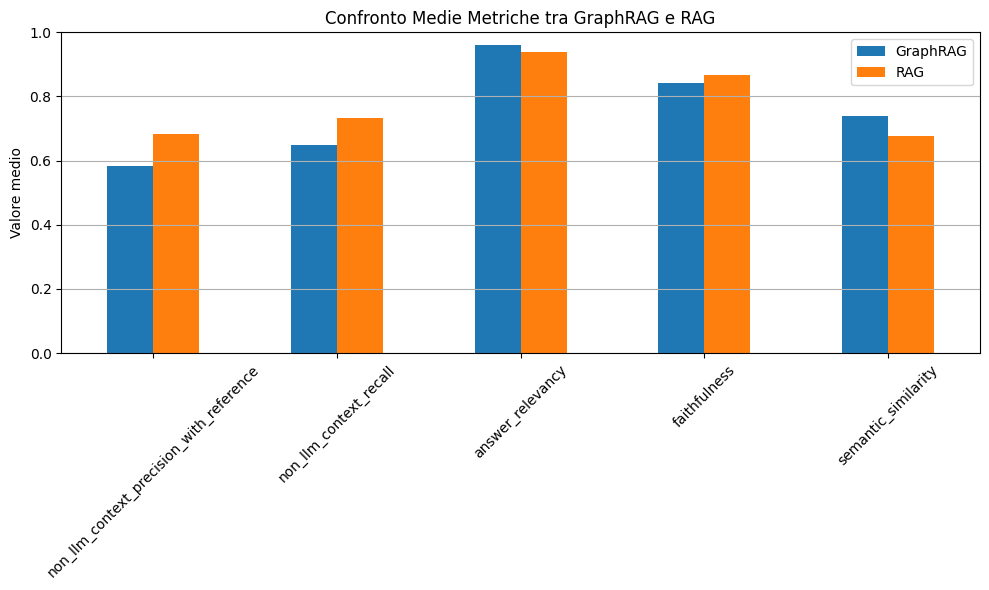

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversione a DataFrame
df_graphRAG = pd.DataFrame(res_graphRAG)
df_RAG = pd.DataFrame(res_RAG)

# Calcolo medie
mean_graphRAG = df_graphRAG.mean()
mean_RAG = df_RAG.mean()

# Unione per confronto
comparison_df = pd.DataFrame({
    'GraphRAG': mean_graphRAG,
    'RAG': mean_RAG
})

# Stampa dei valori medi
print("Confronto delle medie tra GraphRAG e RAG:")
print(comparison_df)

# Plot confronto
comparison_df.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Confronto Medie Metriche tra GraphRAG e RAG')
plt.ylabel('Valore medio')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Stampa risultati su file

In [11]:

df_graphRAG = pd.DataFrame(results_graphRAG)
df_graphRAG.to_csv(path_data_results + "results_graphRAG.csv", mode='a', header=False, index=False)

In [12]:
df_RAG = pd.DataFrame(results_RAG)
df_RAG.to_csv(path_data_results + "results_RAG.csv", mode='a', header=False, index=False)